This notebook is to test the load data and models  

In [1]:
import sys
sys.path.append("./mypkg")
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT

In [2]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

In [3]:
import time
from collections import defaultdict
from pathlib import Path

import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils.fastmri import get_dataset, run_varnet_model, load_model

In [4]:
data_path = DATA_ROOT/"brain/multicoil_val"
mask_type = "equispaced"

'equispaced'

In [5]:

model1 = load_model(is_Ysq=False);
model2 = load_model(is_Ysq=True);

dataset = get_dataset(data_path, mask_type, 0.04, 4);

In [21]:
batch = dataset[0];
res1 = run_varnet_model(batch, model1)
res2 = run_varnet_model(batch, model2,  is_Ysq=True);
target = batch.target.numpy();

In [26]:
np.abs(res1-np.sqrt(res2)).mean(), np.abs(res1-target).mean(), np.abs(np.sqrt(res2)-target).mean()

(1.3016279e-06, 4.2040106e-06, 3.7330537e-06)

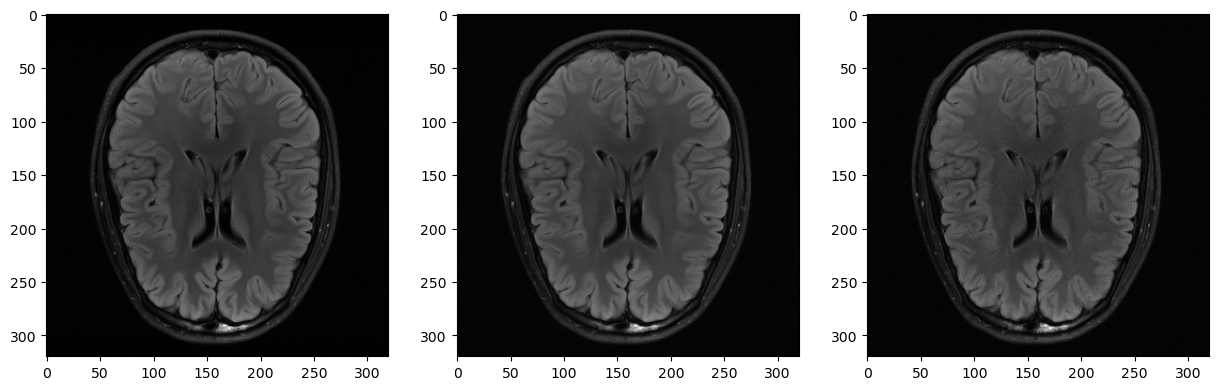

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(res1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(np.sqrt(res2), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(target, cmap='gray')